In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm

In [2]:
df = pd.read_csv("project_data.csv")
df.head()

,Показник,Базисний період,Територіальний розріз,Тип товарів і послуг,Періодичність,1991,1991-M01,1991-M02,1991-M03,1991-M04,...,2024-M04,2024-M05,2024-M06,2024-M07,2024-M08,2024-M09,2024-M10,2024-M11,2024-M12,2025-M01
0,Базовий індекс споживчих цін,До відповідного місяця попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,104.4,104.4,105.0,105.7,106.5,107.3,108.3,109.3,110.7,111.7
1,Базовий індекс споживчих цін,До відповідного періоду попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,104.4,104.4,104.5,104.7,104.9,105.2,105.5,105.8,106.3,111.7
2,Базовий індекс споживчих цін,До грудня попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,102.5,102.8,103.3,104.1,104.8,106.6,108.0,109.3,110.7,101.3
3,Базовий індекс споживчих цін,До попереднього місяця,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,100.7,100.3,100.5,100.7,100.7,101.7,101.3,101.2,101.3,101.3
4,Індекс споживчих цін,До відповідного місяця попереднього року,Україна,Індекс споживчих цін,Місячна,NaN,NaN,NaN,NaN,NaN,...,103.2,103.3,104.8,105.4,107.5,108.6,109.7,111.2,112.0,112.9


In [3]:
start = 1991
end = 2018
columns_to_drop = []
for i in range(start, end+1):
    columns_to_drop.append(str(i))
    for j in range(1, 13):
        if j <= 9:
            columns_to_drop.append(f"{i}-M0{j}")
        else:
            columns_to_drop.append(f"{i}-M{j}")
    

In [4]:
df_from_2019 = df.drop(columns=columns_to_drop)
# df_from_2019.to_csv('data_from_2019.csv', index=False)

form dataset only from average prices

Filling missing value

In [5]:
num_cols = df_from_2019.columns[5:]

avg_prices[num_cols] = avg_prices[num_cols].apply(pd.to_numeric, errors='coerce')

avg_prices[num_cols] = avg_prices[num_cols].interpolate(method='linear', axis=1).round(2)

avg_prices.to_csv('filled_data.csv', index=False)

NameError: name 'avg_prices' is not defined

In [556]:
# avg_prices.isnull().sum().to_dict()
# missing_values = {col: count for col, count in avg_prices.isnull().sum().to_dict().items() if count >= 1}
# missing_values 

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


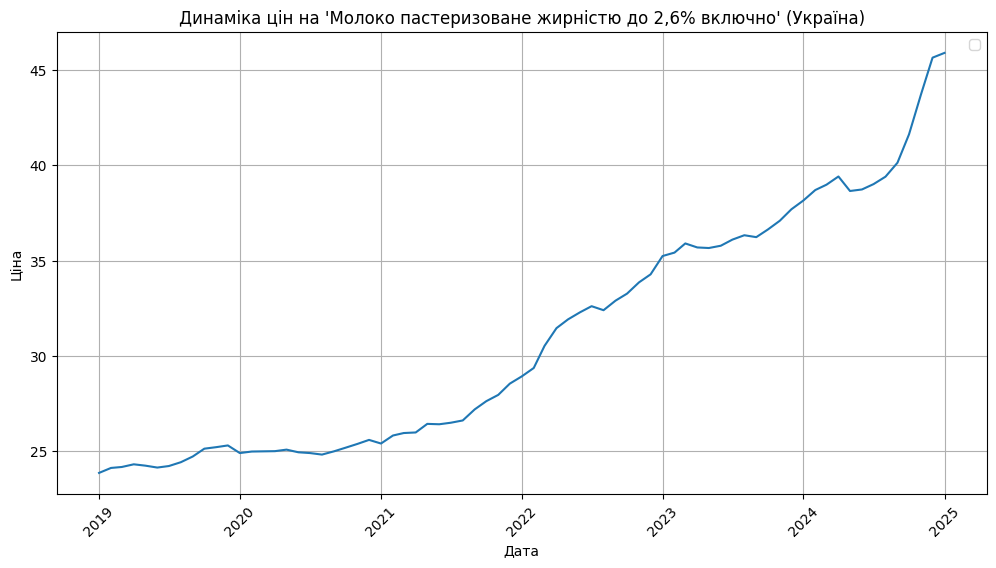

In [557]:
def price_ploting(df, product_name, region):

    row = df[(df["Тип товарів і послуг"] == product_name) & 
                    (df["Територіальний розріз"] == region)]

    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")  # "2019-M01" → "2019-01"

    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices)
    plt.xlabel("Дата")
    plt.ylabel("Ціна")
    plt.title(f"Динаміка цін на '{product_name}' ({region})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

product_name = "Молоко пастеризоване жирністю до 2,6% включно"
region = "Україна"
price_ploting(avg_prices, product_name, region)

    


apply moving average for milk

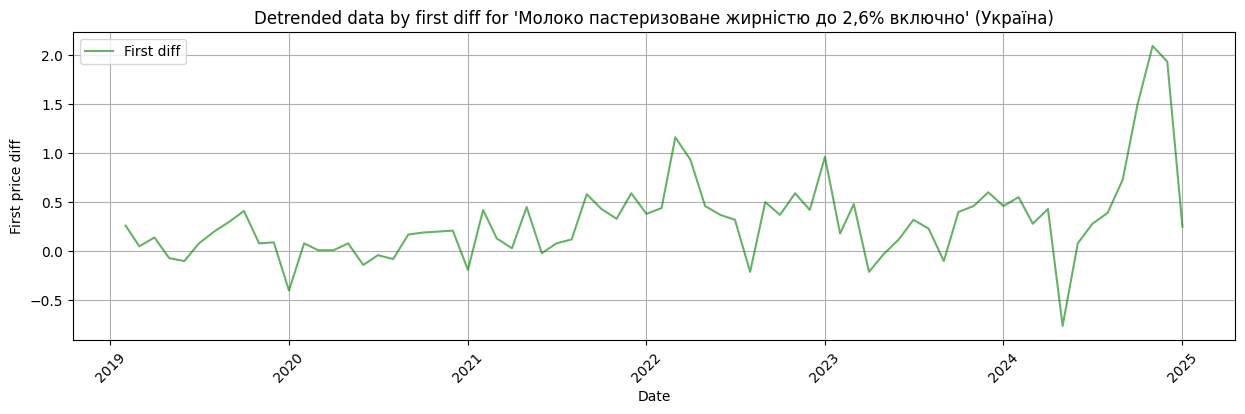

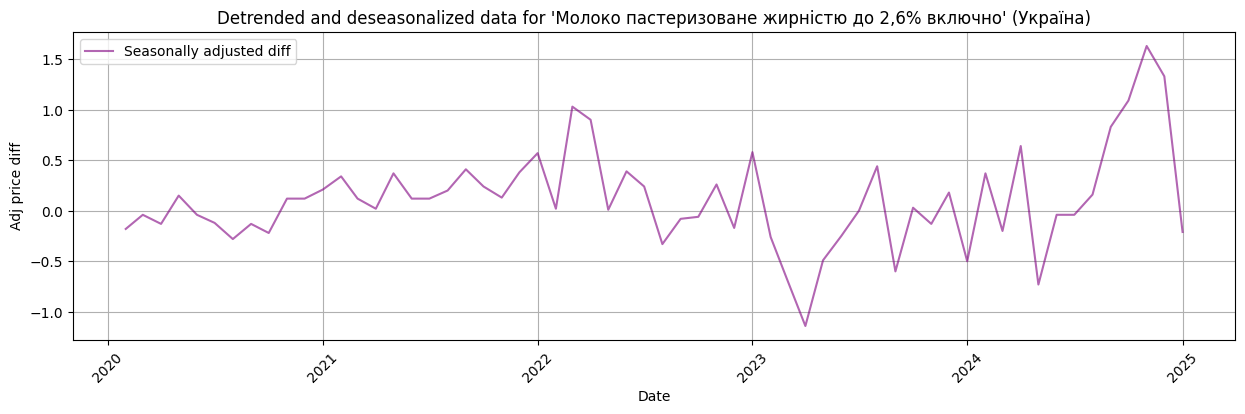

In [558]:
# def plotting_moving_average(df, window_size, product_name, region):
#     # row = df[(df["Тип товарів і послуг"] == product_name) & 
#     #                 (df["Територіальний розріз"] == region)]

#     # price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
#     # prices = row[price_columns].iloc[0]
#     # dates = pd.to_datetime(price_columns, format="%Y-M%m")

#     # # window_size = 12

#     # plt.figure(figsize=(15, 4))
#     # plt.plot(dates, prices, label="original prices", alpha=0.6)

#     # rolling_mean = prices.rolling(window_size).mean().shift(-window_size // 2)
#     # plt.plot(dates, rolling_mean, label=f"mooving average ({window_size} months)", color="blue")

#     # expanding_mean = prices.expanding().mean()
#     # plt.plot(dates, expanding_mean, label="expanding_mean", color="red", linestyle="--")

#     # plt.xlabel("Дата")
#     # plt.ylabel("Ціна")
#     # plt.title(f"Динаміка цін на '{product_name}' ({region}) - mooving average")
#     # plt.legend()
#     # plt.grid()
#     # plt.xticks(rotation=45)
#     # plt.show()
#     # return rolling_mean 
#     row = df[(df["Тип товарів і послуг"] == product_name) & 
#              (df["Територіальний розріз"] == region)]
    
#     price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
#     prices = row[price_columns].iloc[0]
#     dates = pd.to_datetime(price_columns, format="%Y-M%m")
    
#     first_diffs = prices.diff(1)
    
#     plt.figure(figsize=(15, 4))
#     plt.plot(dates, first_diffs, label="first differences", alpha=0.6, color='green')
#     plt.title(f"Detrended series by first differences for '{product_name}' ({region})")
#     plt.xlabel("Дата")
#     plt.ylabel("Перша різниця цін")
#     plt.legend()
#     plt.grid()
#     plt.xticks(rotation=45)
#     plt.show()
    
#     plt.figure(figsize=(15, 4))
#     first_diffs.rolling(12).mean().plot(label='rolling mean', color='blue')
#     first_diffs.rolling(12).std().plot(label='rolling std', color='red', linestyle='--')
#     plt.title("Rolling mean and std of first differences")
#     plt.legend()
#     plt.grid()
#     plt.show()
    
#     return first_diffs


def detrend_and_deseasonalize(df, product_name, region, seasonal_lag=12):
    # Фільтруємо рядок за товаром і регіоном
    row = df[(df["Тип товарів і послуг"] == product_name) & 
             (df["Територіальний розріз"] == region)]
    
    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")
    
    first_diffs = prices.diff(1)
    
    seasonal_diffs = first_diffs.diff(seasonal_lag)
    
    plt.figure(figsize=(15, 4))
    plt.plot(dates, first_diffs, label="First diff", alpha=0.6, color='green')
    plt.title(f"Detrended data by first diff for '{product_name}' ({region})")
    plt.xlabel("Date")
    plt.ylabel("First price diff")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(15, 4))
    plt.plot(dates, seasonal_diffs, label="Seasonally adjusted diff", alpha=0.6, color='purple')
    plt.title(f"Detrended and deseasonalized data for '{product_name}' ({region})")
    plt.xlabel("Date")
    plt.ylabel("Adj price diff")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    
    return seasonal_diffs


product_name = "Молоко пастеризоване жирністю до 2,6% включно"
region = "Україна"
detrended_milk = detrend_and_deseasonalize(avg_prices, product_name, region, 12)

ЦУКОР

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


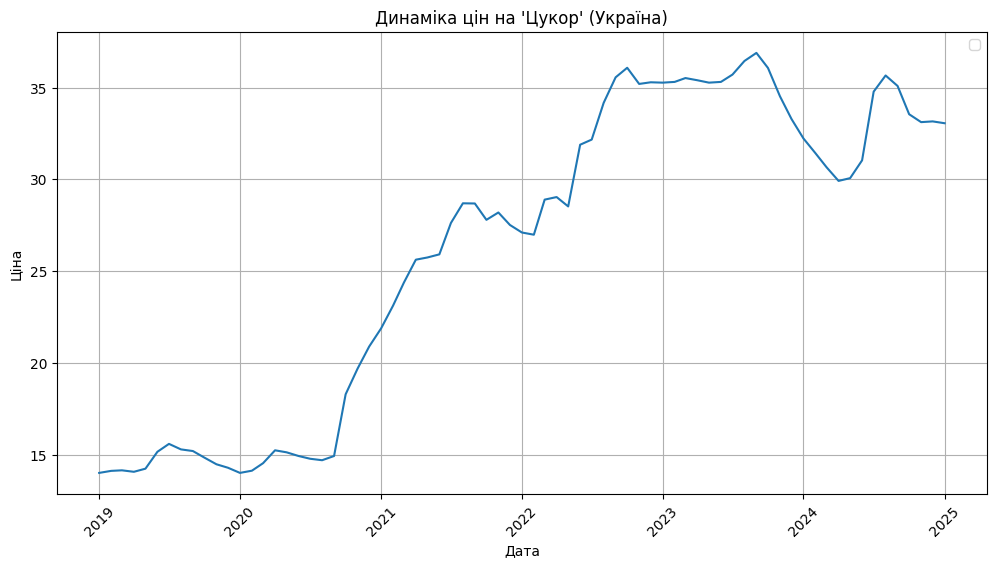

In [559]:
product_name = "Цукор"
region = "Україна"
price_ploting(avg_prices, product_name, region)


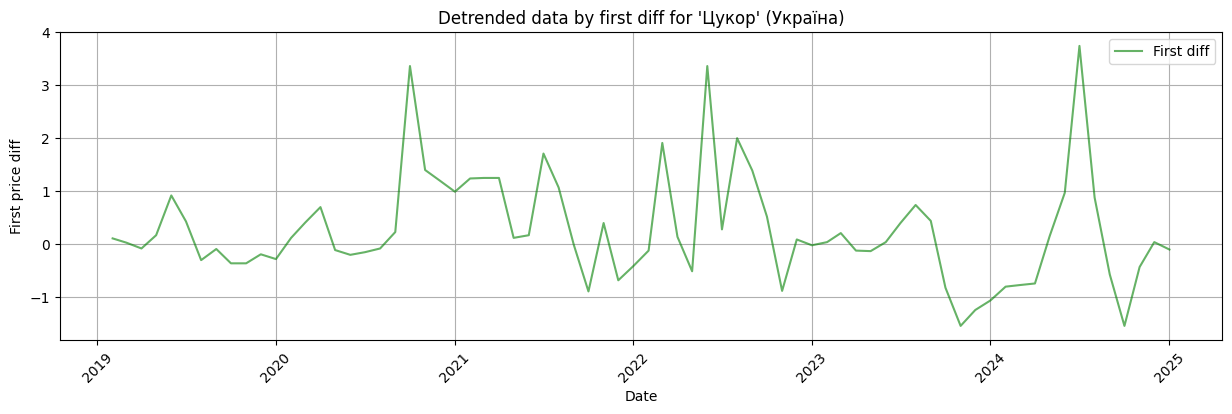

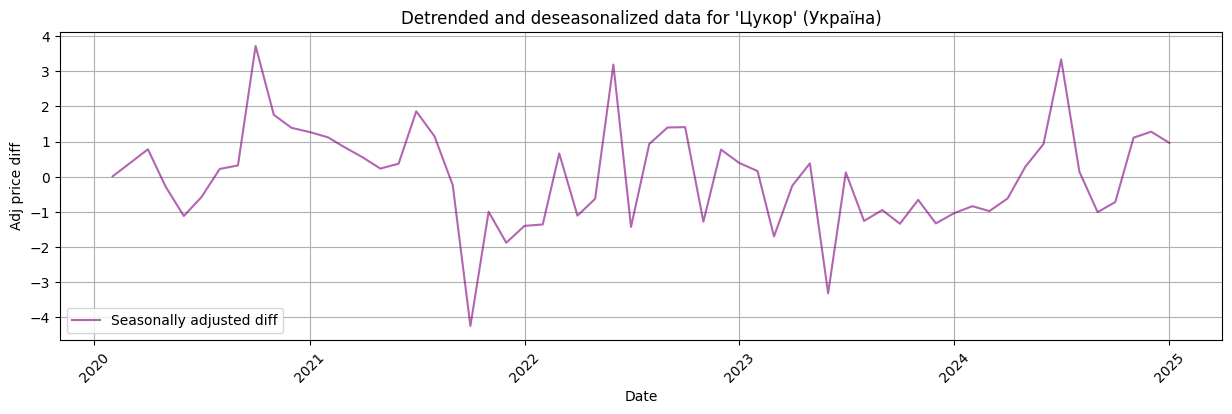

In [560]:
detrended_deseas_sugar = detrend_and_deseasonalize(avg_prices,product_name, region, 12)

Картопля

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


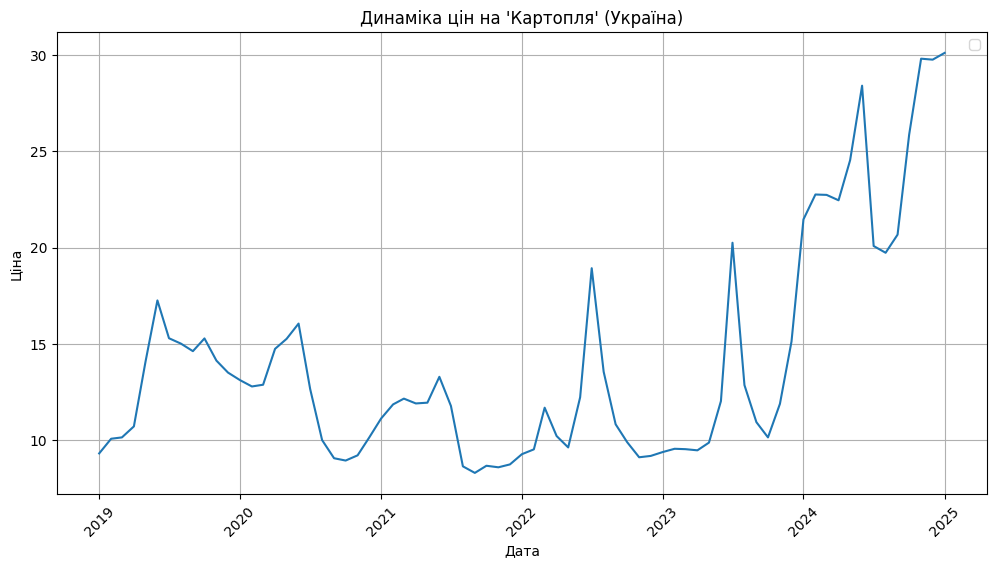

In [561]:
product_name = "Картопля"
region = "Україна"
price_ploting(avg_prices, product_name, region)

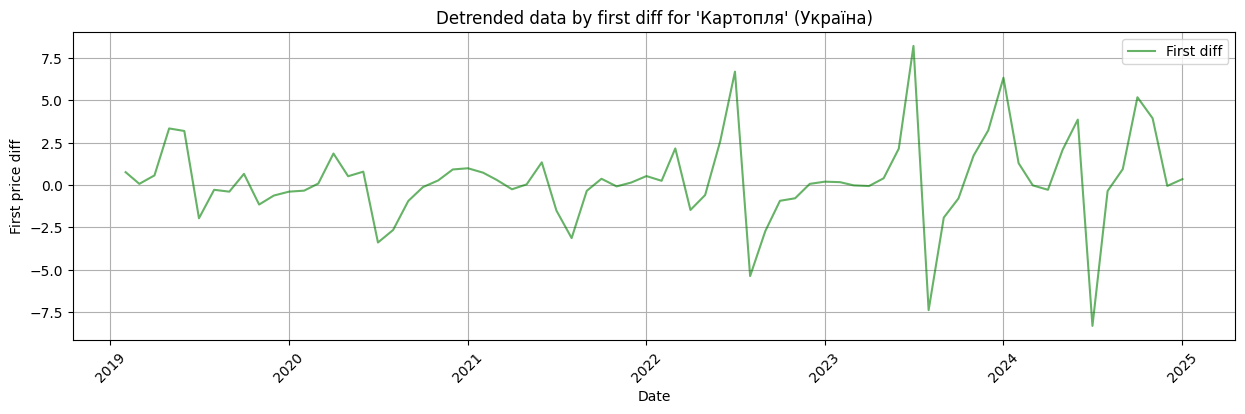

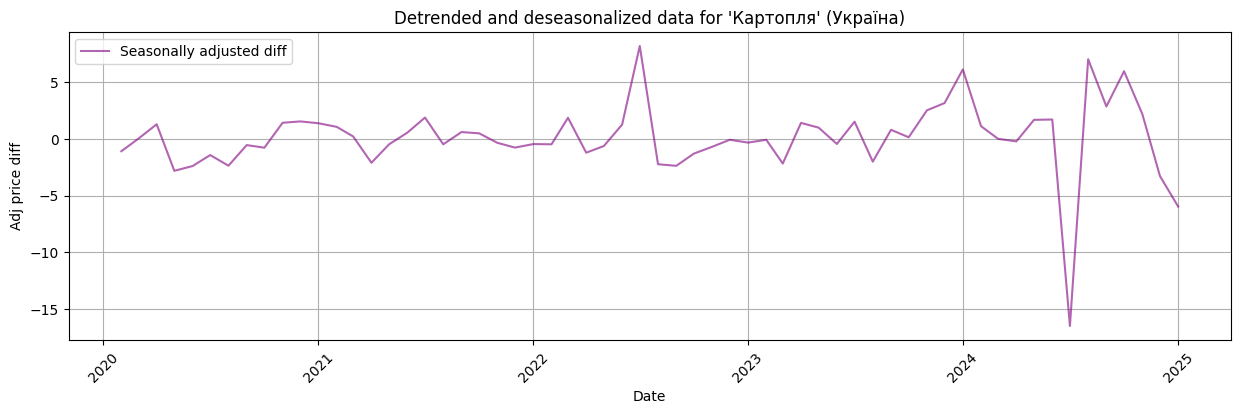

In [562]:
detrended_potato = detrend_and_deseasonalize(avg_prices, product_name, region, 12)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


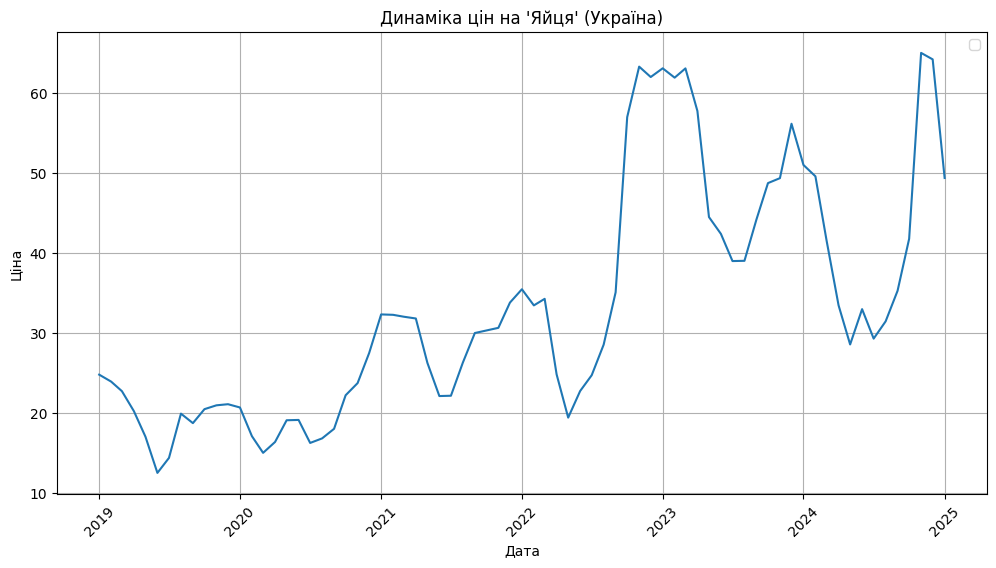

In [563]:
product_name = "Яйця"
region = "Україна"
price_ploting(avg_prices, product_name, region)

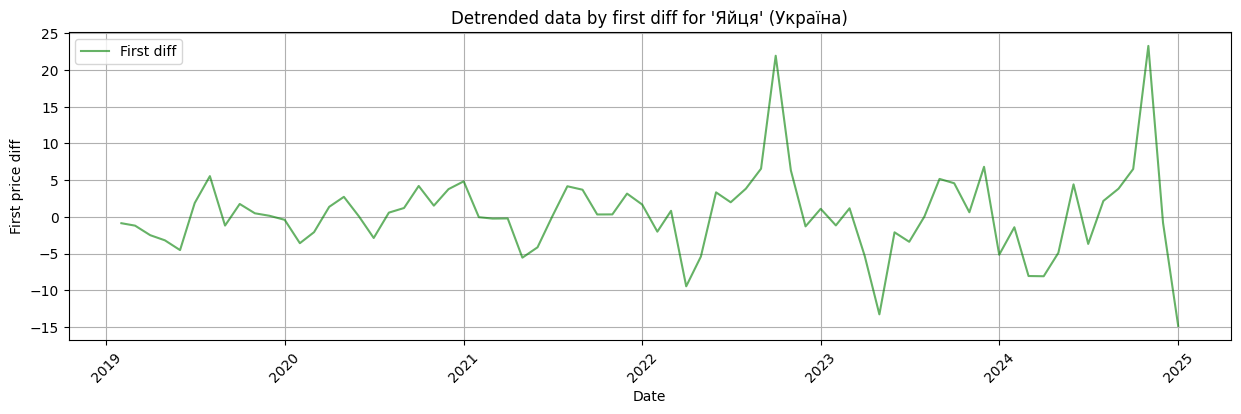

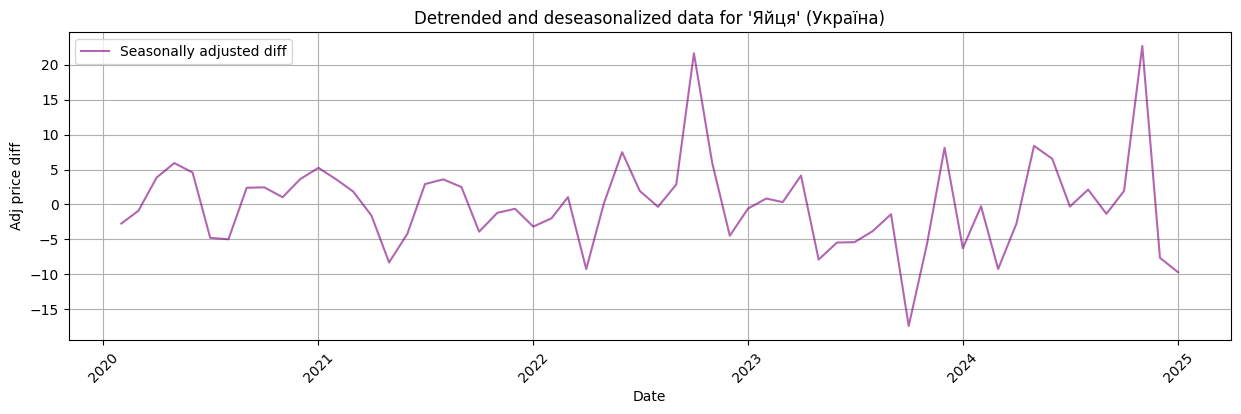

In [564]:
detrended_eggs = detrend_and_deseasonalize(avg_prices, "Яйця", "Україна", 12)

#продукти обʼєднані по групам (почищена і погрупована дата)

In [565]:
avg_prices_grouped = avg_prices

bread_mapping = {el: "Хліб" for el in bread}
cereals_mapping = {el: "Крупи" for el in cereals}
# . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
meat_mapping = {el: "Мʼясо свійських тварин та птиці" for el in meat}
pasta_mapping = {el: "Макарони" for el in pasta}
kubasa_mapping = {el: "Ковбасні вироби" for el in kybasa}
fish_mapping = {el: "Риба" for el in fish}
dairy_mapping = {el: "Молочні продукти" for el in dairy}
cheese_mapping = {el: "Сир" for el in cheese}
vege_mapping = {el: "Овочі" for el in vege}

all_mapping = [bread_mapping, cereals_mapping, meat_mapping, pasta_mapping, kubasa_mapping, fish_mapping, dairy_mapping, cheese_mapping, vege_mapping]



for mapping in all_mapping:
    avg_prices_grouped['Тип товарів і послуг'] = avg_prices_grouped['Тип товарів і послуг'].replace(mapping)

result = avg_prices_grouped.groupby(['Територіальний розріз', 'Тип товарів і послуг']).mean(numeric_only=True).round(2)

result = result.reset_index()

result.to_csv("grouped_bread.csv")



/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


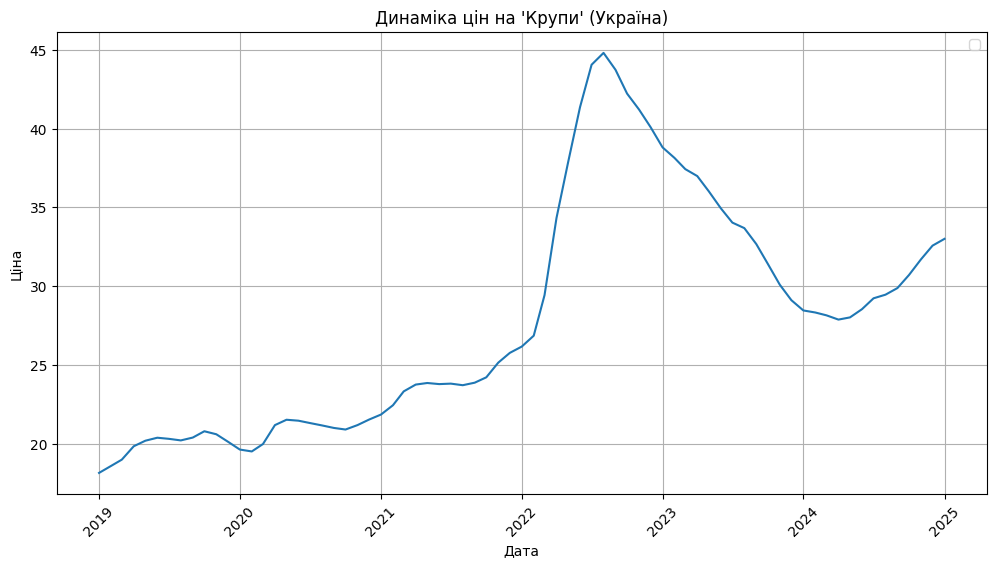

In [566]:
product_name = "Крупи"
region = "Україна"
price_ploting(result, product_name, region)

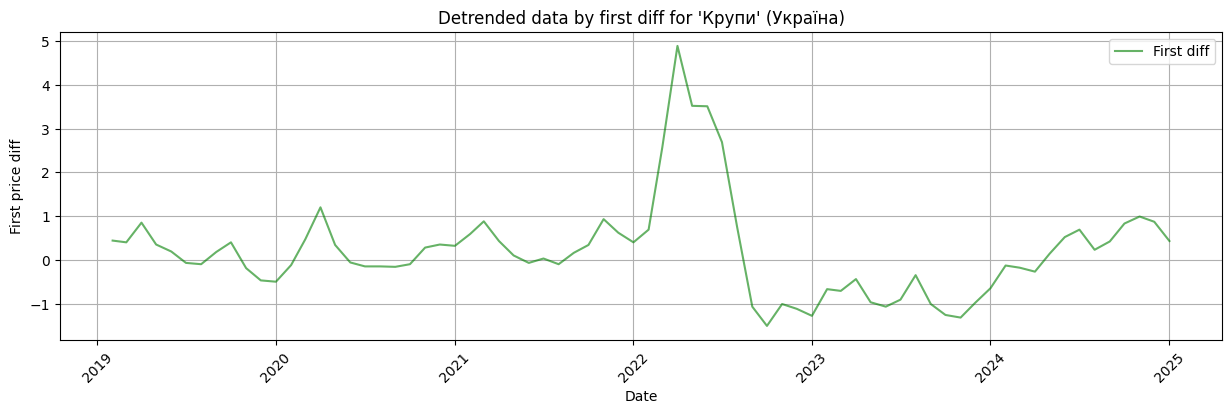

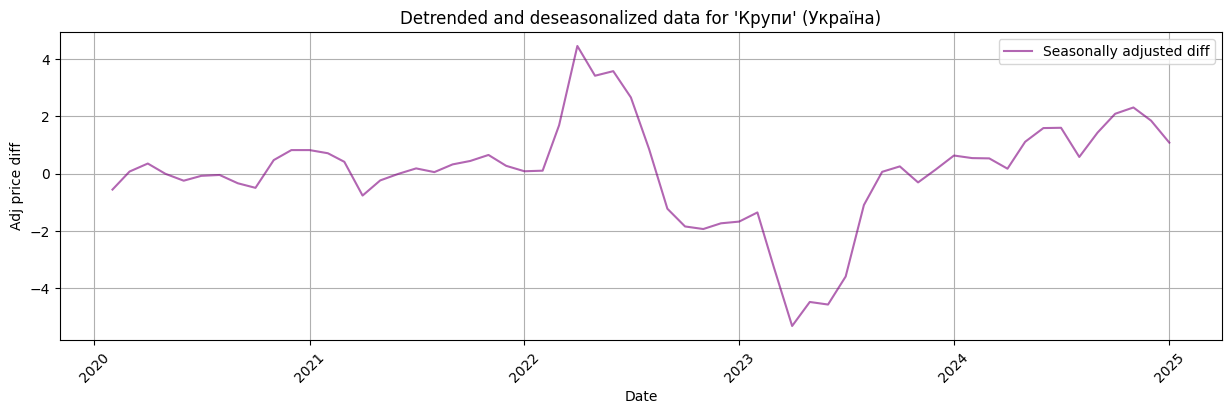

In [567]:
detrended_cereals = detrend_and_deseasonalize(result, "Крупи", region, 12)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


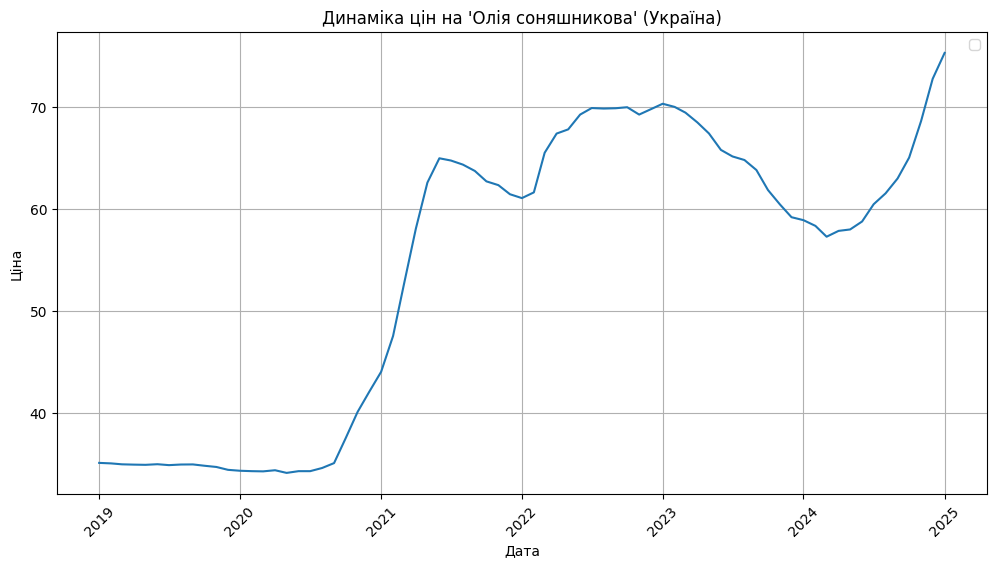

In [568]:
product_name = "Олія соняшникова"
region = "Україна"
price_ploting(result, product_name, region)

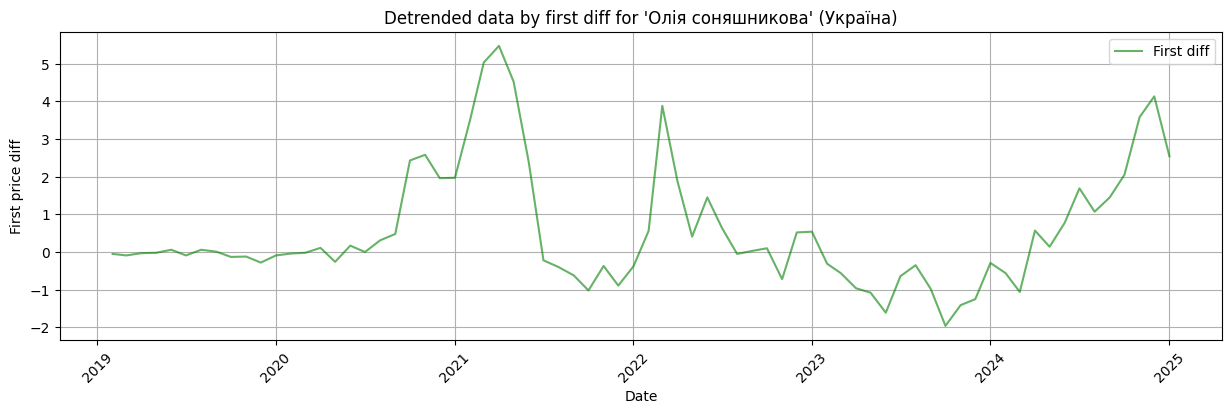

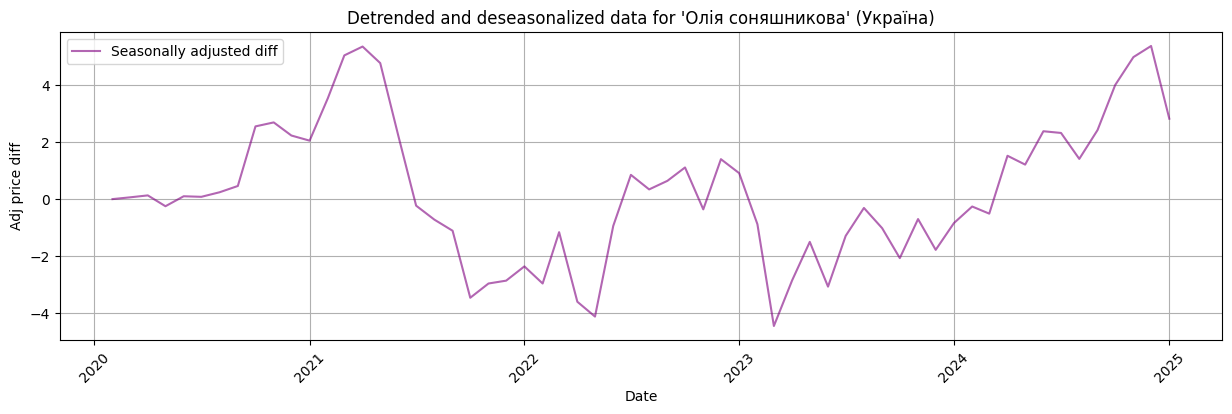

In [569]:
detrended_oil = detrend_and_deseasonalize(result, product_name, region, 12)

In [570]:
def test_stationarity(series):
    result_adf = adfuller(series)
    result_kpss = kpss(series, regression='c', nlags="auto")

    print("ADF-test:")
    print(f"test statistic: {result_adf[0]:.4f}")
    print(f"p-value: {result_adf[1]:.4f}")
    print(f"critical values: {result_adf[4]}")
    print("stationary" if result_adf[1] < 0.05 else "Non-stationary")

    print("\nKPSS Test:")
    print(f"test statistic: {result_kpss[0]:.4f}")
    print(f"p-value: {result_kpss[1]:.4f}")
    print(f"critical values: {result_kpss[3]}")
    print("non-stationary" if result_kpss[1] < 0.05 else "Stationary")

In [571]:
test_stationarity(detrended_oil.dropna())

ADF-test:
test statistic: -2.0727
p-value: 0.2556
critical values: {'1%': np.float64(-3.5463945337644063), '5%': np.float64(-2.911939409384601), '10%': np.float64(-2.5936515282964665)}
Non-stationary

KPSS Test:
test statistic: 0.1641
p-value: 0.1000
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/4052952039.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series, regression='c', nlags="auto")


In [572]:
test_stationarity(detrended_eggs.dropna())
# кул, воно стаціонарне

ADF-test:
test statistic: -3.8158
p-value: 0.0028
critical values: {'1%': np.float64(-3.5745892596209488), '5%': np.float64(-2.9239543084490744), '10%': np.float64(-2.6000391840277777)}
stationary

KPSS Test:
test statistic: 0.0868
p-value: 0.1000
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/4052952039.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series, regression='c', nlags="auto")


In [573]:
test_stationarity(detrended_cereals.dropna())

ADF-test:
test statistic: -2.8332
p-value: 0.0537
critical values: {'1%': np.float64(-3.548493559596539), '5%': np.float64(-2.912836594776334), '10%': np.float64(-2.594129155766944)}
Non-stationary

KPSS Test:
test statistic: 0.1076
p-value: 0.1000
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/4052952039.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series, regression='c', nlags="auto")


In [574]:
def moving_average_and_deseasonalize(df, product_name, region, window_size=18, seasonal_lag=12):
    # Filter the data by product and region
    row = df[(df["Тип товарів і послуг"] == product_name) & 
             (df["Територіальний розріз"] == region)]
    
    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")
    
    # Moving average for detrending
    moving_avg = prices.rolling(window_size).mean().shift(-window_size // 2)  # Apply moving average to detrend
    
    # Seasonal differencing for deseasonalizing
    seasonal_diffs = prices.diff(seasonal_lag)  # Apply seasonal differencing
    
    # Visualizing the original and moving average (detrended series)
    plt.figure(figsize=(15, 4))
    plt.plot(dates, prices, label="Original Prices", alpha=0.6, color='gray')
    plt.plot(dates, moving_avg, label=f"Moving Average (Window={window_size})", color='blue')
    plt.title(f"Detrended series by Moving Average for '{product_name}' ({region})")
    plt.xlabel("Дата")
    plt.ylabel("Ціна")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    # Visualizing the deseasonalized series
    plt.figure(figsize=(15, 4))
    plt.plot(dates, seasonal_diffs, label="Seasonally Adjusted Series", alpha=0.6, color='purple')
    plt.title(f"Detrended and Deseasonalized Series for '{product_name}' ({region})")
    plt.xlabel("Дата")
    plt.ylabel("Сезонно скоригована цінова зміна")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    # Additional – Rolling mean and standard deviation for the deseasonalized series
    plt.figure(figsize=(15, 4))
    seasonal_diffs.rolling(seasonal_lag).mean().plot(label='Rolling Mean', color='blue')
    seasonal_diffs.rolling(seasonal_lag).std().plot(label='Rolling Std', color='red', linestyle='--')
    plt.title("Rolling Mean and Std of Detrended & Deseasonalized Series")
    plt.legend()
    plt.grid()
    plt.show()
    
    return seasonal_diffs


In [575]:
def pct_change_and_deseasonalize(df, product_name, region, seasonal_lag=12):
    # Filter the data by product and region
    row = df[(df["Тип товарів і послуг"] == product_name) & 
             (df["Територіальний розріз"] == region)]
    
    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")
    
    # Percentage change for detrending
    pct_changes = prices.pct_change()  # Calculate percentage change
    
    # Seasonal differencing for deseasonalizing
    seasonal_diffs = pct_changes.diff(seasonal_lag)  # Apply seasonal differencing
    
    # Visualizing the percentage changes (detrended series)
    plt.figure(figsize=(15, 4))
    plt.plot(dates, pct_changes, label="Percentage changes", alpha=0.6, color='green')
    plt.title(f"Detrended data by percentage changes for '{product_name}' ({region})")
    plt.xlabel("Дата")
    plt.ylabel("Процентна зміна цін")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    # Visualizing the deseasonalized series
    plt.figure(figsize=(15, 4))
    plt.plot(dates, seasonal_diffs, label="Seasonally adj percent hanges", alpha=0.6, color='purple')
    plt.title(f"Detrended and deseas data for '{product_name}' ({region})")
    plt.xlabel("Дата")
    plt.ylabel("Сезонно скоригована процентна зміна цін")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    # Additional – Rolling mean and standard deviation for the deseasonalized series
    plt.figure(figsize=(15, 4))
    seasonal_diffs.rolling(seasonal_lag).mean().plot(label='Rolling Mean', color='blue')
    seasonal_diffs.rolling(seasonal_lag).std().plot(label='Rolling Std', color='red', linestyle='--')
    plt.title("Rolling Mean and Std of Detrended & Deseasonalized Series")
    plt.legend()
    plt.grid()
    plt.show()
    
    return seasonal_diffs

# ХЛІБ всьому голова

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


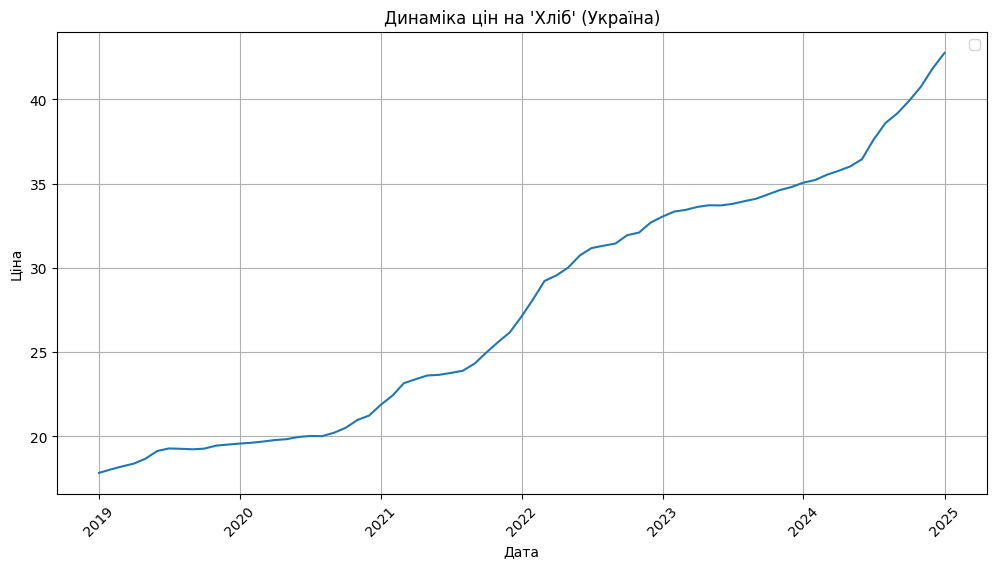

In [576]:
product_name = "Хліб"
region = "Україна"
price_ploting(result, product_name, region)

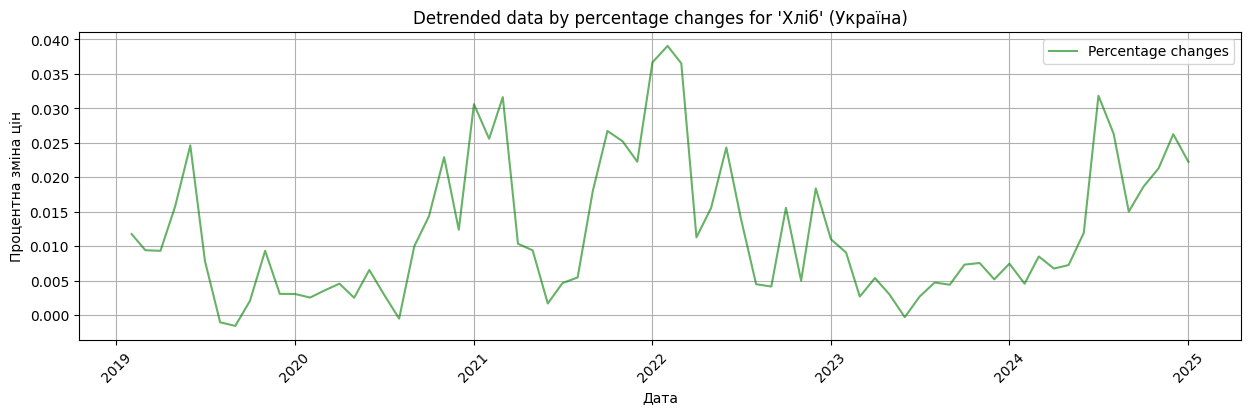

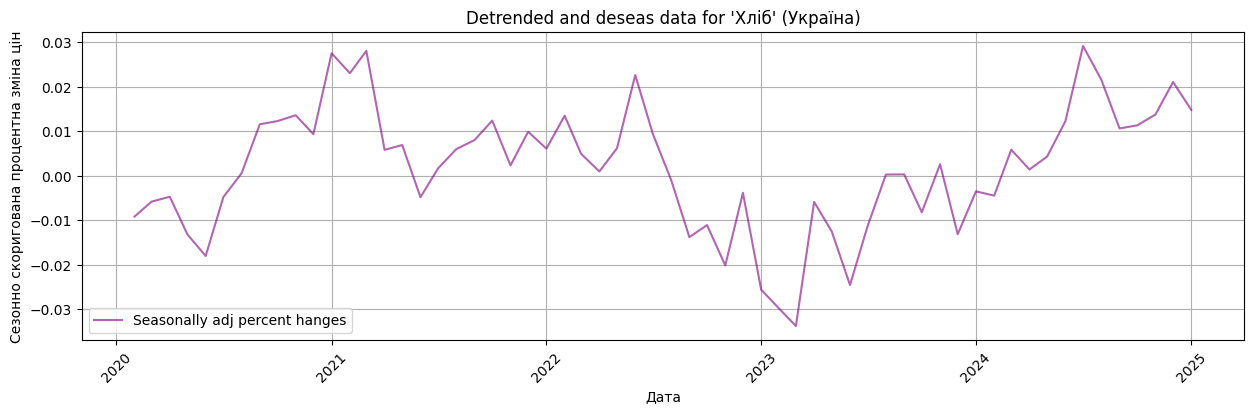

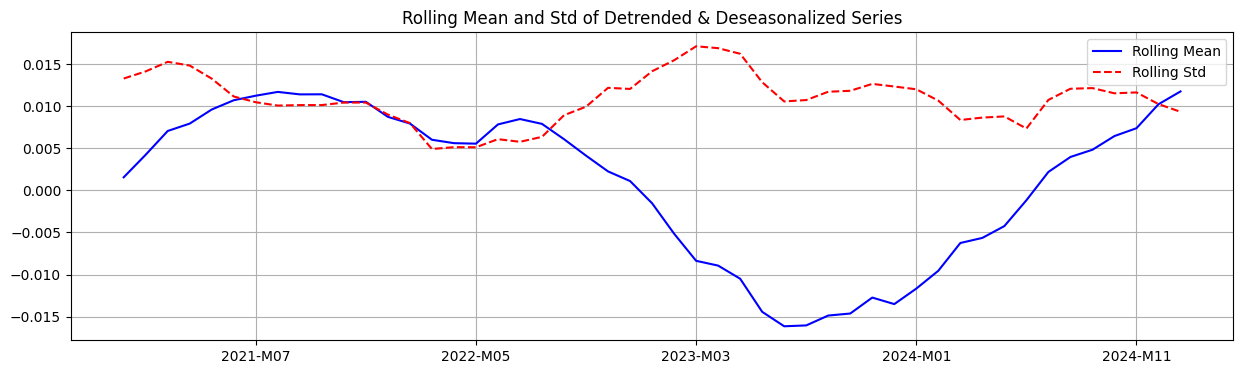

In [577]:
detrended_bread = pct_change_and_deseasonalize(result, product_name, region, 12)

In [578]:
test_stationarity(detrended_bread.dropna())

ADF-test:
test statistic: -2.1384
p-value: 0.2293
critical values: {'1%': np.float64(-3.5552728880540942), '5%': np.float64(-2.9157312396694217), '10%': np.float64(-2.5956695041322315)}
Non-stationary

KPSS Test:
test statistic: 0.1474
p-value: 0.1000
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/4052952039.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series, regression='c', nlags="auto")


In [579]:
test_stationarity(detrended_potato.dropna())

ADF-test:
test statistic: -5.4416
p-value: 0.0000
critical values: {'1%': np.float64(-3.5506699942762414), '5%': np.float64(-2.913766394626147), '10%': np.float64(-2.5946240473991997)}
stationary

KPSS Test:
test statistic: 0.0937
p-value: 0.1000
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/4052952039.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_kpss = kpss(series, regression='c', nlags="auto")
